<a href="https://colab.research.google.com/github/ViniciusARZ/Machine-Learning-Analytics/blob/main/GTM_Regression_%26_Corr_Studies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Account to SQL Lin Reg

In [ ]:
# Getting internal API Token 
import requests
res = requests.post('https://metabase.slangapp.com/api/session', 
                    headers = {"Content-Type": "application/json"},
                    json =  {"username": "v.ramos@slangapp.com", 
                             "password": "Corepride17*"}
                   )
assert res.ok == True
token = res.json()['id']
## Card / Query
import pandas as pd
res = requests.get('https://metabase.slangapp.com/api/card', 
              headers = {'Content-Type': 'application/json',
                        'X-Metabase-Session': token
                        }
            )
res.json()

In [ ]:
res = requests.get('https://metabase.slangapp.com/api/card', 
              headers = {'Content-Type': 'application/json',
                        'X-Metabase-Session': token
                        }
            )
res.json()

In [ ]:
import pandas as pd
res = requests.post('https://metabase.slangapp.com/api/card/1957/query/json', ## ACCOUNT TO SQL 3 MONTH ROLL AVG
              headers = {'Content-Type': 'application/json',
                        'X-Metabase-Session': token
                        }
            )
df = pd.DataFrame(res.json())
df

,SQL MONTH,SENT MONTH,SQLs,Accounts Sent,Account to SQL,Rol Avg 3
0,2021-01-01,2021-01-01,31.0,1462,NaN,NaN
1,2021-02-01,2021-02-01,59.0,2054,0.040356,0.040356
2,2021-03-01,2021-03-01,81.0,2892,0.039435,0.039895
3,2021-04-01,2021-04-01,85.0,2599,0.029391,0.036394
4,2021-05-01,2021-05-01,94.0,2978,0.036168,0.034998
5,2021-06-01,2021-06-01,102.0,2694,0.034251,0.033270
6,2021-07-01,2021-07-01,85.0,2433,0.031552,0.033990
7,2021-08-01,2021-08-01,90.0,3669,0.036991,0.034265
8,2021-09-01,2021-09-01,104.0,2987,0.028346,0.032296
9,2021-10-01,2021-10-01,115.0,2861,0.038500,0.034612


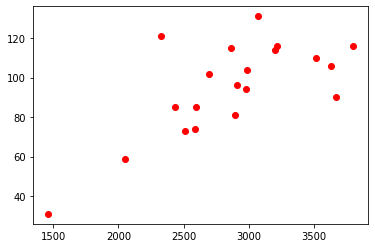

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df["Accounts Sent"],df["SQLs"],color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d47c16b90>,
      dtype=object)

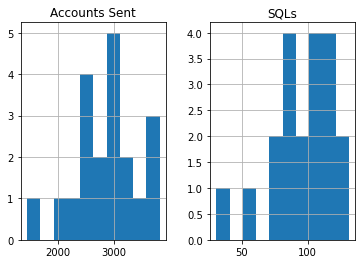

In [ ]:
df[["Accounts Sent","SQLs"]].hist()

In [ ]:
df[["Accounts Sent","SQLs"]].corr()

,Accounts Sent,SQLs
Accounts Sent,1.000000,0.690819
SQLs,0.690819,1.000000


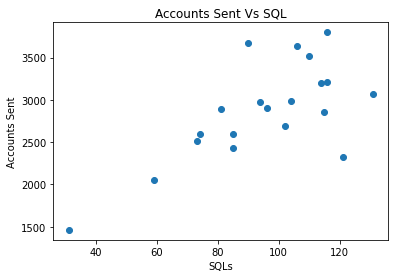

In [ ]:
x=df[["SQLs"]]
x.head(1)

y=df[["Accounts Sent"]]
y.head(1)

plt.scatter(x, y)
plt.title('Accounts Sent Vs SQL')
plt.xlabel('SQLs')
plt.ylabel('Accounts Sent')
plt.show()

Text(0, 0.5, 'Accounts Sent')

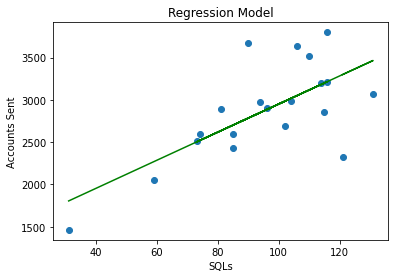

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)
plt.scatter(x,y)
plt.plot(x,lin_reg.predict(x),color='green')
plt.title("Regression Model")
plt.xlabel("SQLs")
plt.ylabel("Accounts Sent")

In [ ]:
#predict Accounts Needed for 150 SQLs
ypredict=lin_reg.predict(np.array([[150]]))
ypredict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[3780.99637599]])

In [ ]:
#slope
lin_reg.coef_

array([[16.60613265]])

In [ ]:
#intecerpt
lin_reg.intercept_

array([1290.07647811])

MSE: Distance of Errors from the Reg Line, smaller the better forecast

RMSE: Sdv of the Errors, how spread out they are. Direct rel to the corr coef

In [ ]:
ypredict=lin_reg.predict(x)

from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
print ("Coefficient of determination :",r2_score(y,ypredict))
print ("MSE: ",mean_squared_error(y,ypredict))
print("RMSE: ",np.sqrt(mean_squared_error(y,ypredict)))

Coefficient of determination : 0.4772312569632916
MSE:  163583.0320334609
RMSE:  404.4539924805551
